## Import model

A simple model of Electric Vehical agents moving around a space. Overtime they move between locations and use their battery charge, then go to find a charge point. The model was based on some introductory mesa examples found here: [Intro Tutorial](http://mesa.readthedocs.io/en/latest/intro-tutorial.html).

The program runs via one model class instance, and many agents as part of the model schedule. Each timestep the model schedule runs the internal "step function" for each agent. 

As the model runs, the agents move around loosing charge, when they get to their desired location they update where they want to go next, then when they start running out of charge they seek a charging point.

In [1]:
from model.model import *
import matplotlib.pyplot as plt

### Create model instance with parameters:
N=100, Number of EV agents
width=10., size of grid
height=10., size of grid
speed=1, distance an agent can move in one timestep
N_Charge=10, number of charging points
discharge_rate=0.01, loss of charge per movement step
CP_loc='random',  location of charging points
model_name = 0, model name for saving out results
MoveType = 'loc', EV movement type
charge_rate = 0.2, EV charging speed when at charging point
CP_capacity=10, max number of EVs per charge point

In [2]:
# optional parameters for the model
model = EVSpaceModel(N=100, width=10., height=10., speed=1, N_Charge=10,discharge_rate=0.05,CP_loc='inputs\CP_locs.csv',
                    model_name = 0, MoveType = 'loc', charge_rate = 0.2, CP_capacity=10)

### run the model 
for X steps, then print the model dataframe

In [3]:
model.run_model(200)  

### print model results

In [4]:
mdf = model.datacollector.get_model_vars_dataframe()
adf = model.datacollector.get_agent_vars_dataframe()
print(mdf.tail(10))
print(adf.tail(10))

     av_charge  completed_trip  dead_cars
191   0.588457              13          0
192   0.606457              13          0
193   0.626457              16          0
194   0.646457              14          0
195   0.660457              11          0
196   0.668457              16          0
197   0.676457              13          0
198   0.674457              13          0
199   0.660457              13          0
200   0.644457              19          0
                charge last_location next_location  \
Step AgentID                                         
200  90       0.326383        charge        charge   
     91       0.905266        charge          work   
     92       0.811519          work        random   
     93       0.823739          home          work   
     94       0.780240          work        random   
     95       0.239769          home          work   
     96       0.455541          work          home   
     97       0.662659        charge        charge  

[Text(0.5, 0, 'Steps'), Text(0, 0.5, 'Average charge')]

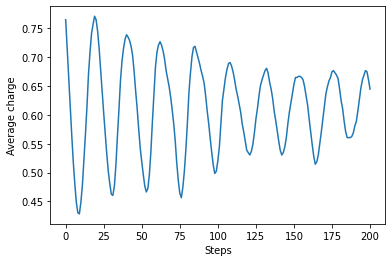

In [5]:
fig, ax = plt.subplots()
ax.plot(mdf.index, mdf['av_charge'])
ax.set(xlabel='Steps', ylabel='Average charge')

In [15]:
[dict_x.__dict__['pos'] for x,dict_x in model.schedule_CP._agents.items()]

[(2, 2), (2, 5), (2, 8), (5, 2), (5, 5), (5, 8), (8, 2), (8, 5), (8, 8)]